In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/train.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(path="/content/datasets/cats&dogs")


In [4]:
import os,shutil,matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# length_cat = len(os.listdir(r'/home/hassan-ahmed-khan/Ai Practice/datasets/cats&dogs/Cat'))
# length_dog = len(os.listdir(r'/home/hassan-ahmed-khan/Ai Practice/datasets/cats&dogs/Dog'))
length = len(os.listdir(r'/content/datasets/cats&dogs/train'))

In [6]:
# print(length_cat)
# print(length_dog)
print(length)

25000


In [7]:
base_dir = r'/content/datasets/cats&dogs'
dataset_dir = os.path.join(base_dir,'Data')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cat_dir = os.path.join(train_dir,'cat')
test_cat_dir = os.path.join(test_dir,'cat')
validation_cat_dir = os.path.join(validation_dir,'cat')
train_dog_dir = os.path.join(train_dir,'dog')
test_dog_dir = os.path.join(test_dir,'dog')
validation_dog_dir = os.path.join(validation_dir,'dog')

In [9]:
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)
os.mkdir(train_cat_dir)
os.mkdir(test_cat_dir)
os.mkdir(validation_cat_dir)
os.mkdir(train_dog_dir)
os.mkdir(test_dog_dir)
os.mkdir(validation_dog_dir)

In [10]:
len(os.listdir(dataset_dir))

25000

In [11]:
train_cats = [f'cat.{i}.jpg' for i in range(1000)]
for cat in train_cats:
    src_dir = os.path.join(dataset_dir,cat)
    dst_dir = os.path.join(train_cat_dir,cat)
    shutil.copyfile(src_dir,dst_dir)


In [12]:
validation_cats = [f'cat.{i}.jpg' for i in range(1000,1500)]
for cat in validation_cats:
    src_dir = os.path.join(dataset_dir,cat)
    dst_dir = os.path.join(validation_cat_dir,cat)
    shutil.copyfile(src_dir,dst_dir)

In [13]:
test_cats = [f'cat.{i}.jpg' for i in range(1500,2000)]
for cat in test_cats:
    src_dir = os.path.join(dataset_dir,cat)
    dst_dir = os.path.join(test_cat_dir,cat)
    shutil.copyfile(src_dir,dst_dir)

In [14]:
train_dogs = [f'dog.{i}.jpg' for i in range(1000)]
for dog in train_dogs:
    src_dir = os.path.join(dataset_dir,dog)
    dst_dir = os.path.join(train_dog_dir,dog)
    shutil.copyfile(src_dir,dst_dir)

validation_dogs = [f'dog.{i}.jpg' for i in range(1000,1500)]
for dog in validation_dogs:
    src_dir = os.path.join(dataset_dir,dog)
    dst_dir = os.path.join(validation_dog_dir,dog)
    shutil.copyfile(src_dir,dst_dir)

test_dogs = [f'dog.{i}.jpg' for i in range(1500,2000)]
for dog in test_dogs:
    src_dir = os.path.join(dataset_dir,dog)
    dst_dir = os.path.join(test_dog_dir,dog)
    shutil.copyfile(src_dir,dst_dir)



In [15]:
print('total training dog images:', len(os.listdir(test_dog_dir)))

total training dog images: 500


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [16]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss = 'binary_crossentropy' , metrics=['acc'])
# model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [17]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_data_gen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data,label in train_generator:
    print(data.shape)
    print(label.shape)
    break

(20, 150, 150, 3)
(20,)


In [19]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30


<ipython-input-19-22669bbbb6ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


100/100 [==============================] - 12s 62ms/step - loss: 0.6909 - acc: 0.5300 - val_loss: 0.6822 - val_acc: 0.5150
Epoch 2/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6726 - acc: 0.5800 - val_loss: 0.6566 - val_acc: 0.6220
Epoch 3/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6542 - acc: 0.6065 - val_loss: 0.6516 - val_acc: 0.6130
Epoch 4/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6195 - acc: 0.6605 - val_loss: 0.6736 - val_acc: 0.5940
Epoch 5/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5898 - acc: 0.6635 - val_loss: 0.6079 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5623 - acc: 0.7090 - val_loss: 0.6300 - val_acc: 0.6480
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5328 - acc: 0.7455 - val_loss: 0.5863 - val_acc: 0.6740
Epoch 8/30
100/100 [==============================] - 6s 63ms/step - loss: 0.51

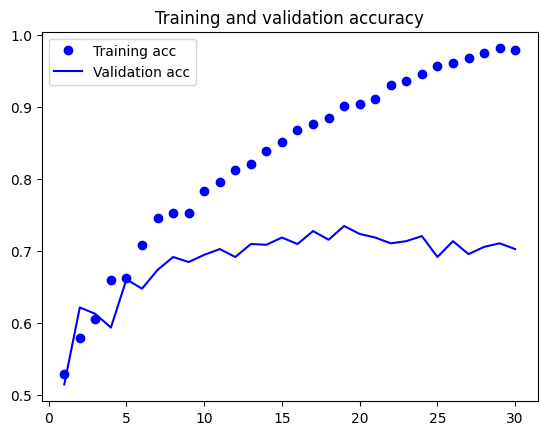

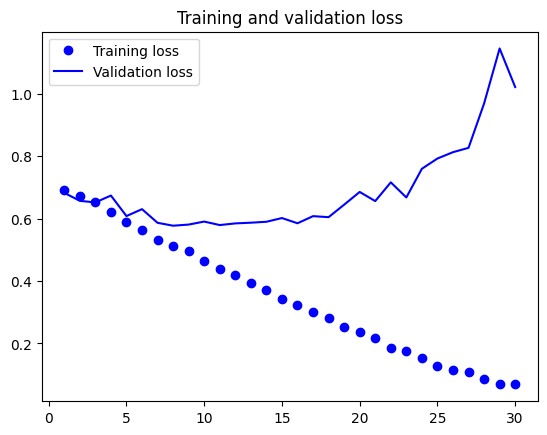

In [20]:
# history.history.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



## Applying Data Augmentation

In [21]:
train_data_generator = ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,vertical_flip=True,rotation_range=40,zoom_range=0.2)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_data_generator.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data, label in train_generator:
    print(data.shape)
    print(label.shape)
    break

(20, 150, 150, 3)
(20,)


In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [24]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [26]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30


<ipython-input-26-22669bbbb6ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


100/100 [==============================] - 15s 153ms/step - loss: 0.5714 - acc: 0.6965 - val_loss: 0.5848 - val_acc: 0.6860
Epoch 2/30
100/100 [==============================] - 16s 164ms/step - loss: 0.5699 - acc: 0.6845 - val_loss: 0.5535 - val_acc: 0.7020
Epoch 3/30
100/100 [==============================] - 16s 156ms/step - loss: 0.5663 - acc: 0.7075 - val_loss: 0.5567 - val_acc: 0.7060
Epoch 4/30
100/100 [==============================] - 15s 153ms/step - loss: 0.5557 - acc: 0.7010 - val_loss: 0.5621 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 15s 153ms/step - loss: 0.5665 - acc: 0.6900 - val_loss: 0.5617 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 16s 164ms/step - loss: 0.5560 - acc: 0.7120 - val_loss: 0.5400 - val_acc: 0.7170
Epoch 7/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5638 - acc: 0.7020 - val_loss: 0.5363 - val_acc: 0.7210
Epoch 8/30
100/100 [==============================] - 15s 153ms/st

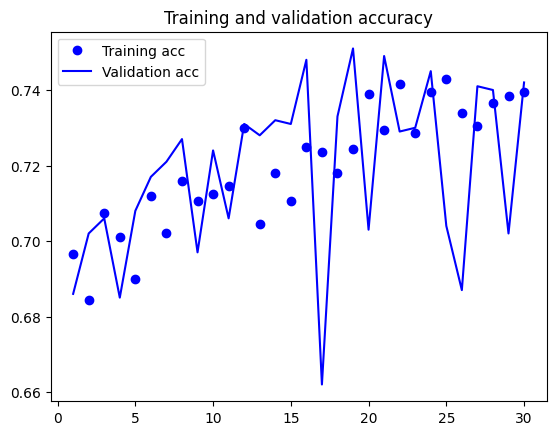

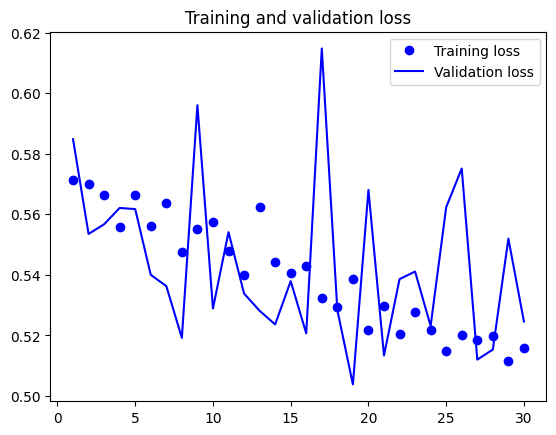

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# ===============================================================

In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [17]:
conv = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [18]:
# conv = VGG16(weights='imagenet',include_top=True,input_shape=(150, 150, 3))
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [19]:
data_gen = ImageDataGenerator(rescale=1./255)
batch_size = 20

# def feature_extraction(directory,sample_size):
#     feature = np.zeros((sample_size,4,4,512))
#     labels = np.zeros((sample_size))
#     feature_gen = data_gen.flow_from_directory(directory,batch_size=batch_size,target_size=(150,150),class_mode='binary')
#     i=0
#     for data,labels in feature_gen:
#         predicton = conv.predict(data)
#         feature[i*batch_size : (i+1)*batch_size] = predicton
#         labels[i*batch_size:(i+1)*batch_size] = labels
#         i+=1]
#           if i*batch_size >= sample_size:
#             break
#     return features,labels

def feature_extraction(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = data_gen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels






In [20]:
train_features,train_labels = feature_extraction(train_dir,2000)
print('============================================================')
test_features,test_labels = feature_extraction(test_dir,1000)
print('============================================================')
validation_features,validation_labels = feature_extraction(validation_dir,1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 31ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 20ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step


In [21]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
test_features = np.reshape(test_features,(1000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))

In [34]:
model= models.Sequential()
model.add(layers.Flatten())
# model.add(layers.Dense(256,activation='relu',input_dim=(4*4*512)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [35]:
history = model.fit(train_features,train_labels,epochs=30,validation_data=(validation_features,validation_labels))

Epoch 1/30
63/63 [==============================] - 1s 9ms/step - loss: 0.6107 - acc: 0.6560 - val_loss: 0.4615 - val_acc: 0.8140
Epoch 2/30
63/63 [==============================] - 0s 5ms/step - loss: 0.4596 - acc: 0.7800 - val_loss: 0.3861 - val_acc: 0.8440
Epoch 3/30
63/63 [==============================] - 0s 6ms/step - loss: 0.3858 - acc: 0.8310 - val_loss: 0.3402 - val_acc: 0.8640
Epoch 4/30
63/63 [==============================] - 0s 5ms/step - loss: 0.3332 - acc: 0.8570 - val_loss: 0.3148 - val_acc: 0.8740
Epoch 5/30
63/63 [==============================] - 0s 5ms/step - loss: 0.3192 - acc: 0.8690 - val_loss: 0.3000 - val_acc: 0.8840
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 0.2879 - acc: 0.8830 - val_loss: 0.2865 - val_acc: 0.8900
Epoch 7/30
63/63 [==============================] - 0s 5ms/step - loss: 0.2723 - acc: 0.8920 - val_loss: 0.2853 - val_acc: 0.8840
Epoch 8/30
63/63 [==============================] - 0s 6ms/step - loss: 0.2471 - acc: 0.90

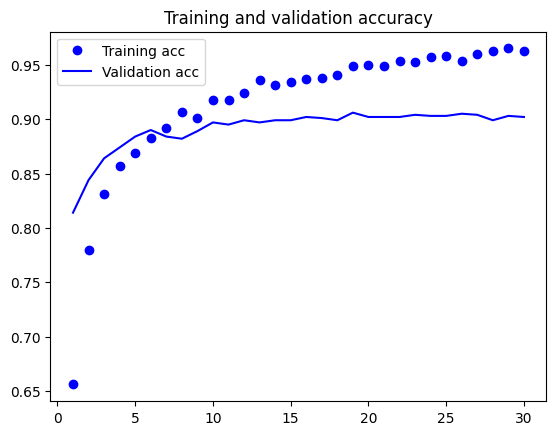

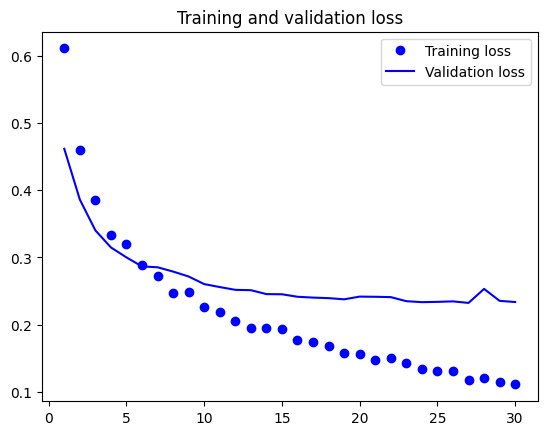

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
model = models.Sequential()
model.add(conv)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18910017 (72.14 MB)
Trainable params: 18910017 (72.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
print(len(model.trainable_weights))

30


In [28]:
conv.trainable = False
print(len(model.trainable_weights))

4


In [29]:
train_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,vertical_flip=True,horizontal_flip=True,rotation_range=40,height_shift_range=0.2,width_shift_range=0.2,fill_mode='nearest')
validation_gen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=20)
validation_generator = validation_gen.flow_from_directory(validation_dir,target_size=(150,150),class_mode='binary',batch_size=20)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
history = model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/30


<ipython-input-45-f2c54abb3878>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,validation_data=validation_generator,validation_steps=50)


100/100 [==============================] - 25s 247ms/step - loss: 0.6001 - acc: 0.6810 - val_loss: 0.3668 - val_acc: 0.8490
Epoch 2/30
100/100 [==============================] - 22s 217ms/step - loss: 0.4742 - acc: 0.7705 - val_loss: 0.2464 - val_acc: 0.8770
Epoch 3/30
100/100 [==============================] - 21s 213ms/step - loss: 0.3851 - acc: 0.8265 - val_loss: 0.2478 - val_acc: 0.8820
Epoch 4/30
100/100 [==============================] - 22s 217ms/step - loss: 0.3358 - acc: 0.8550 - val_loss: 0.1707 - val_acc: 0.9380
Epoch 5/30
100/100 [==============================] - 24s 238ms/step - loss: 0.2939 - acc: 0.8765 - val_loss: 0.1626 - val_acc: 0.9320
Epoch 6/30
100/100 [==============================] - 23s 224ms/step - loss: 0.2817 - acc: 0.8805 - val_loss: 0.1669 - val_acc: 0.9360
Epoch 7/30
100/100 [==============================] - 22s 217ms/step - loss: 0.2370 - acc: 0.9020 - val_loss: 0.1255 - val_acc: 0.9520
Epoch 8/30
100/100 [==============================] - 23s 225ms/st

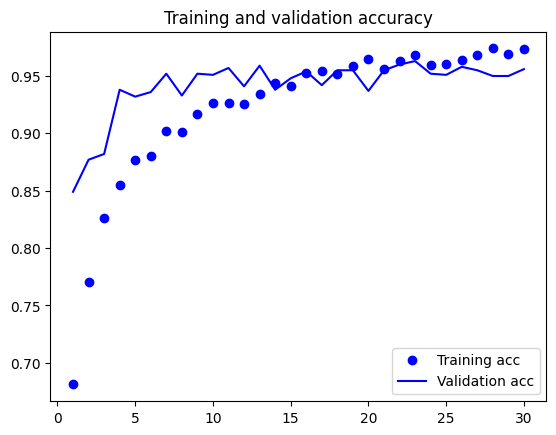

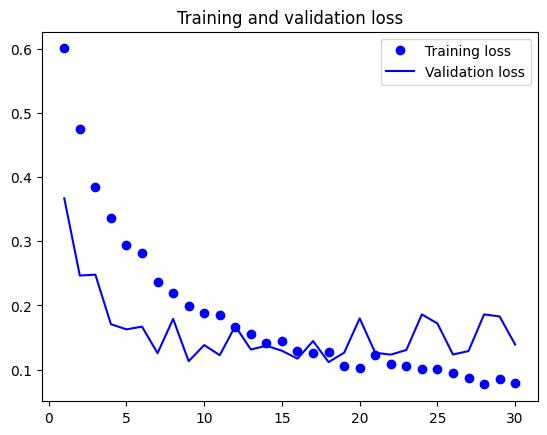

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# ================== FIne Tunning ============================

In [22]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [31]:
conv.trainable = True
set_trainable = False
for layer in conv.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [32]:
model = models.Sequential()
model.add(conv)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['acc'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18910017 (72.14 MB)
Trainable params: 11274753 (43.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [34]:
print(len(model.trainable_weights))

10


In [35]:
history  = model.fit_generator(train_generator,epochs=30,steps_per_epoch =100, validation_data=validation_generator,validation_steps=50)

Epoch 1/30


<ipython-input-35-f384e49c7dd0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  = model.fit_generator(train_generator,epochs=30,steps_per_epoch =100, validation_data=validation_generator,validation_steps=50)


100/100 [==============================] - 23s 191ms/step - loss: 0.6956 - acc: 0.5815 - val_loss: 0.4838 - val_acc: 0.7850
Epoch 2/30
100/100 [==============================] - 19s 187ms/step - loss: 0.5543 - acc: 0.7140 - val_loss: 0.3677 - val_acc: 0.8400
Epoch 3/30
100/100 [==============================] - 18s 183ms/step - loss: 0.4647 - acc: 0.7770 - val_loss: 0.3812 - val_acc: 0.8230
Epoch 4/30
100/100 [==============================] - 18s 182ms/step - loss: 0.4246 - acc: 0.8095 - val_loss: 0.3181 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 20s 194ms/step - loss: 0.4099 - acc: 0.8065 - val_loss: 0.2725 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 22s 222ms/step - loss: 0.3641 - acc: 0.8420 - val_loss: 0.2836 - val_acc: 0.8790
Epoch 7/30
100/100 [==============================] - 23s 235ms/step - loss: 0.3472 - acc: 0.8505 - val_loss: 0.2450 - val_acc: 0.8840
Epoch 8/30
100/100 [==============================] - 21s 209ms/st

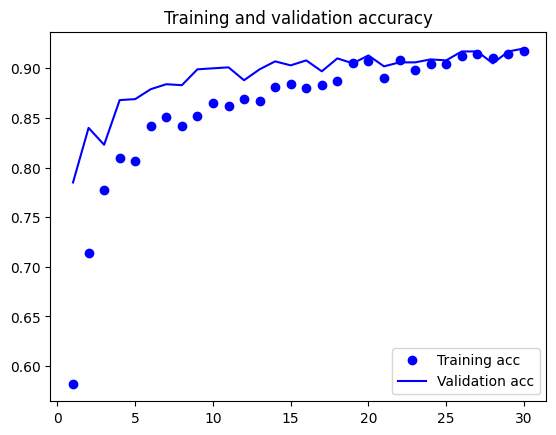

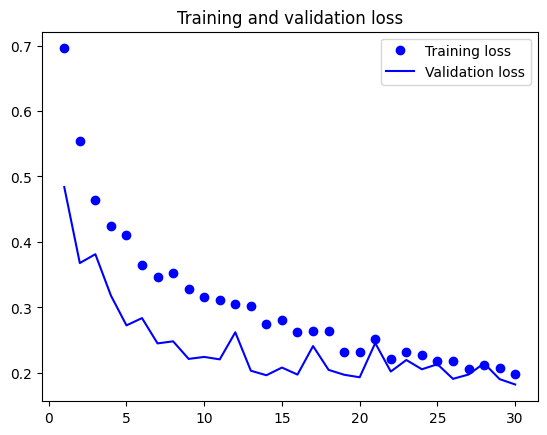

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=20)


Found 1000 images belonging to 2 classes.


In [42]:
import numpy as np

num_samples = test_generator.samples
test_images = np.zeros((num_samples, 150, 150, 3))
test_labels = np.zeros((num_samples,))

i = 0
for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    batch_size = images.shape[0]
    test_images[i:i+batch_size] = images
    test_labels[i:i+batch_size] = labels
    i += batch_size

test_labels = test_labels.astype(int)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import pandas as pd

test_loss, test_acc = model.evaluate(test_generator)
print('Test Accuracy:', test_acc)


predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_labels.astype(int)

50/50 [==============================] - 3s 52ms/step - loss: 0.2245 - acc: 0.9040
Test Accuracy: 0.9039999842643738
32/32 [==============================] - 2s 60ms/step


1/1 [==============================] - 0s 20ms/step


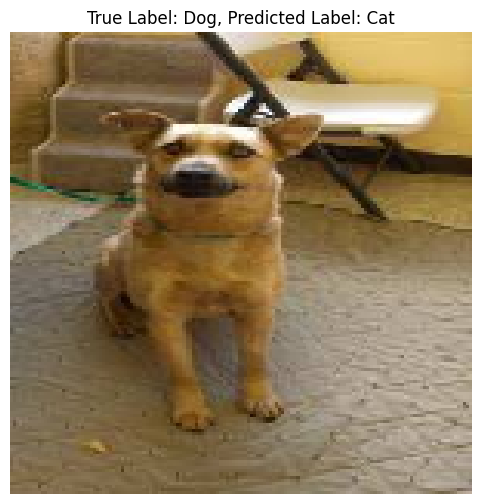

In [60]:
test_images, test_labels = next(test_generator)


image_index = 0
image = test_images[image_index]
true_label = test_labels[image_index]

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction, axis=1)[0]

label_map = {0: 'Cat', 1: 'Dog'}
true_label_str = label_map[int(true_label)]
predicted_label_str = label_map[predicted_label]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"True Label: {true_label_str}, Predicted Label: {predicted_label_str}")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 18ms/step


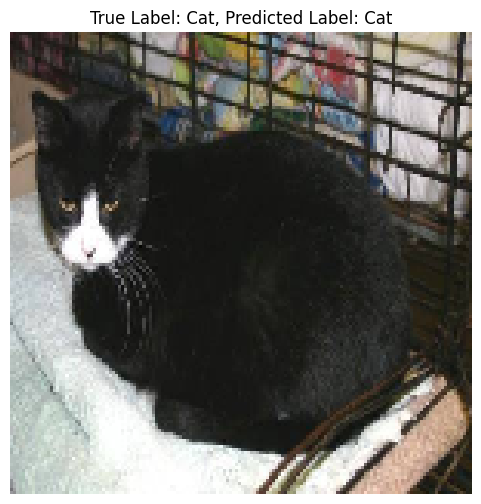

In [62]:

image_index = 1
image = test_images[image_index]
true_label = test_labels[image_index]

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction, axis=1)[0]

label_map = {0: 'Cat', 1: 'Dog'}
true_label_str = label_map[int(true_label)]
predicted_label_str = label_map[predicted_label]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"True Label: {true_label_str}, Predicted Label: {predicted_label_str}")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 18ms/step


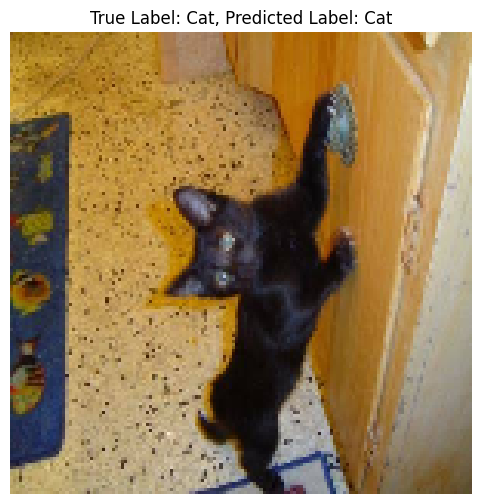

In [73]:
image_index = 12
image = test_images[image_index]
true_label = test_labels[image_index]

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction, axis=1)[0]

label_map = {0: 'Cat', 1: 'Dog'}
true_label_str = label_map[int(true_label)]
predicted_label_str = label_map[predicted_label]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"True Label: {true_label_str}, Predicted Label: {predicted_label_str}")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 18ms/step


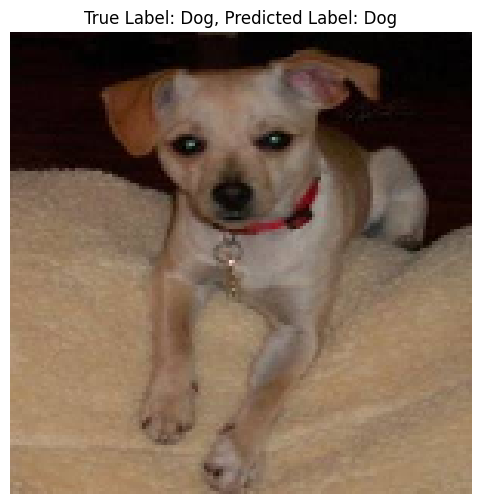

In [92]:
image_index = 0
image = test_images[image_index]
true_label = test_labels[image_index]

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction, axis=1)[0]

label_map = {0: 'Cat', 1: 'Dog'}
true_label_str = label_map[int(true_label)]
predicted_label_str = label_map[predicted_label]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"True Label: {true_label_str}, Predicted Label: {predicted_label_str}")
plt.axis("off")
plt.show()